### Ex 2

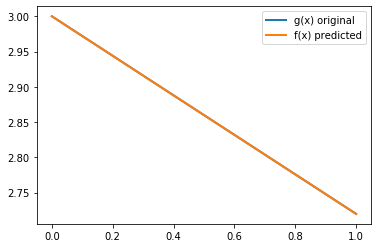

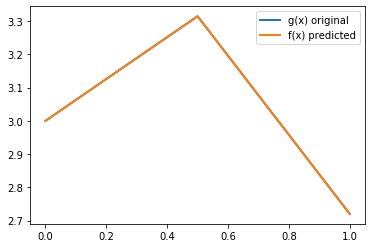

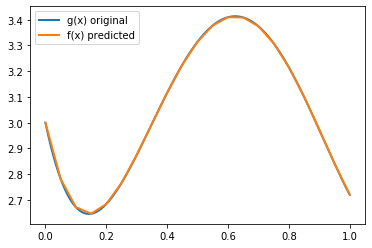

In [3]:

#Group : Satvik , Sai Ramyatha Posani, Achyuth , Mohit Bhagwat

import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from torch import autograd, nn


#function to define every node in the network after the 1 st input layer
def function_input(X_data,b_param,w_param,d_input_bias):
    
    ru = nn.ReLU()
    b_param = np.array(b_param)
    d_input_bias = np.array(d_input_bias)
    w_param = np.array(w_param)
    
    
    torch_w = torch.from_numpy(w_param)
    temp = torch.from_numpy(X_data)
    torch_b = torch.from_numpy(b_param)
    torch_d = torch.from_numpy(d_input_bias)

    torch_n = torch_b + torch_w*ru(temp - torch_d) 
    
    X_data = temp.numpy()
    b_param = torch_b.numpy()
    w_param = torch_w.numpy()
    d_input_bias = torch_d.numpy()
    hidden_layer_input = torch_n.numpy()
    
    return hidden_layer_input

#Sample g function
def function_sample_g(x):
    value_gfunction = 14*(0.99999*x**4 - 2.52*x**3 + 1.9*x**2 - 0.4*x) + 3
    return value_gfunction


# Sample g(x) funtion to be used through the course of our solution
X = np.arange(0.0000,1.0001,0.0001)
SampleG_X = function_sample_g(X)
    
#A) 2 layer neural netweork for two points 
# Part a: We have 2 points 0 and 1 , we have defined a mid-point to evaluate as below:
x = np.array([0., 0.5, 1.])
first_Gvalue = SampleG_X[0]
mid_Gvalue = SampleG_X[0] + (SampleG_X[int(len(X)-1)]-SampleG_X[0])/2
final_Gvalue = SampleG_X[int(len(X)-1)]
y = np.array([SampleG_X[0],mid_Gvalue , final_Gvalue])
# initial random parameters
b = 1.
d = 0.
w = 1.
first_values = [b, w, d]
#Use the curve fit function to estimate the b,d and w values(parameters) 
params, covariance = curve_fit(function_input, x, y, p0 = first_values)
# Store the parameters
b_params, w_params, d_params = params
input_nn = function_input(x,b_params,w_params,d_params)
predict_y = input_nn

# Plot
plt.figure(1)
plt.plot(x,y,label="g(x) original",linewidth=2)
plt.plot(x,predict_y,label="f(x) predicted",linewidth=2)
plt.legend()
plt.show()



#B) 2 layer  neural netweork for three points
x = np.array([0., 0.25, 0.5, 0.75, 1.])
initial_value = SampleG_X[0]
one_fourthvalue = initial_value + (SampleG_X[int((len(X)-1)/2)]-SampleG_X[0])/2
half_value  =  SampleG_X[int((len(X)-1)/2)]
three_fourthvalue = SampleG_X[int((len(X)-1)/2)] + (SampleG_X[int(len(X)-1)]-SampleG_X[int((len(X)-1)/2)])/2
final_value  =  SampleG_X[int(len(X)-1)]
y = np.array([initial_value, one_fourthvalue , half_value , three_fourthvalue,final_value])
#This is using piece-wise linear model
y0 = y[0:int(len(y)/2+1)]
y1 = y[int(len(y)/2):len(y)]
x0 = x[0:int(len(x)/2+1)]
x1 = x[int(len(x)/2):len(x)]
b = 1.
w = 1.
d = 0.
first_values = [b, w, d]
# curve fit for x0
params, covariance = curve_fit(function_input, x0, y0, p0 = first_values)
b_params, w_params, d_params = params
input_nn = function_input(x0,b_params,w_params,d_params)
predict_y0 = input_nn
# curve fit for x1
params, covariance = curve_fit(function_input, x1, y1, p0 = first_values)
b_params, w_params, d_params = params
input_nn1 = function_input(x1,b_params, w_params, d_params)
predict_y1 = input_nn1
#Join the output fragments
predict_y = np.concatenate((predict_y0, predict_y1), axis=0)
predict_x = np.concatenate((x0, x1), axis=0)

plt.figure(2); plt.clf()
plt.plot(x,y,label="g(x) original",linewidth=2)
plt.plot(predict_x,predict_y,label="f(x) predicted",linewidth=2)
plt.legend()
plt.show()



#C) 2 layer netweork for any number of points
epsi = 0.05
X_start = 0.
X_end = 1. + epsi
x = np.arange(X_start, X_end, epsi)
y = function_sample_g(x)
b = 1.
w = 1.
d = 0.
first_values = [b, w, d]

# C.3 iterate through piecewise function and optimize parameters for ReLU nodes
for i in range(1,len(x)):
    x_i = np.array([x[i-1], x[i-1] + (x[i]-x[i-1])/2, x[i]])
    y_i = np.array([y[i-1], y[i-1] + (y[i]-y[i-1])/2, y[i]])
    
    params, covariance = curve_fit(function_input, x_i, y_i, p0 = first_values)
    b_params, w_params, d_params = params
    input_nn_i = function_input(x_i,b_params, w_params, d_params)
    predict_y1 = input_nn1
    
    if i == 1:
        predict_x = x_i
        predict_y = input_nn_i
    else:
        predict_x_new = x_i
        predict_y_new = input_nn_i
        
        predict_x = np.concatenate((predict_x, predict_x_new), axis=0)
        predict_y = np.concatenate((predict_y, predict_y_new), axis=0)

plt.figure(3); plt.clf()
plt.plot(X,SampleG_X,label="g(x) original",linewidth=2)
plt.plot(predict_x,predict_y,label="f(x) predicted",linewidth=2)
plt.legend()
plt.show()

